## write a function that returns the trace of the matrix

In [53]:
import numpy as np
def trace(A):
    if A.shape[0] != A.shape[1] :
        print('not possible to find the trace')
    tr = 0.0
    for i in range(A.shape[0]):
        
        tr += A[i, i] 
    return tr 

A = np.array([[1, 3, -1], [2, 5, -3], [2, 9, -2]], dtype = float)
n = 3
print(np.sum(np.diagonal(A)))
print(np.sum(A.reshape(n ** 2)[0 : n ** 2 : n+1]))

4.0
4.0


## Compute the cross product

In [52]:
def epsi(i, j, k):
        eps = 0
        if i==j==k or i==j or i==k or j==k:
            eps = 0
        elif i == 0 and j==1 and k==2:
            eps = 1
        elif i == 1 and j==2 and k==0:
            eps = 1
        elif i == 2 and j==0 and k==1:
            eps = 1
        elif i == 2 and j==1 and k==0:
            eps= -1
        elif i == 0 and j==2 and k==1:
            eps= -1
        elif i == 1 and j==0 and k==2:
            eps = -1
        return eps
            
def levi(A, B):
    res = np.zeros((3, 1))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                res[i]+=epsi(i, j, k)*A[j]*B[k]
    return res 


A = np.array([1, 2, 3], dtype = float)
B = np.array([4, 5, 6], dtype = float)

L = np.zeros((3, 3, 3))
L[0, 1, 2] = 1
L[1, 2, 0] = 1
L[2, 0, 1] =  1
L[1, 0, 2] = -1
L[2, 1, 0] = -1
L[0, 2, 1] = -1

res = np.einsum('ijk, j,k->i', L, A, B)

print(levi(A, B))
print(res)

[[-3.]
 [ 6.]
 [-3.]]
[-3.  6. -3.]


## Compute the Legendre polynomials on the interval [-1,1] using the following recursion relation

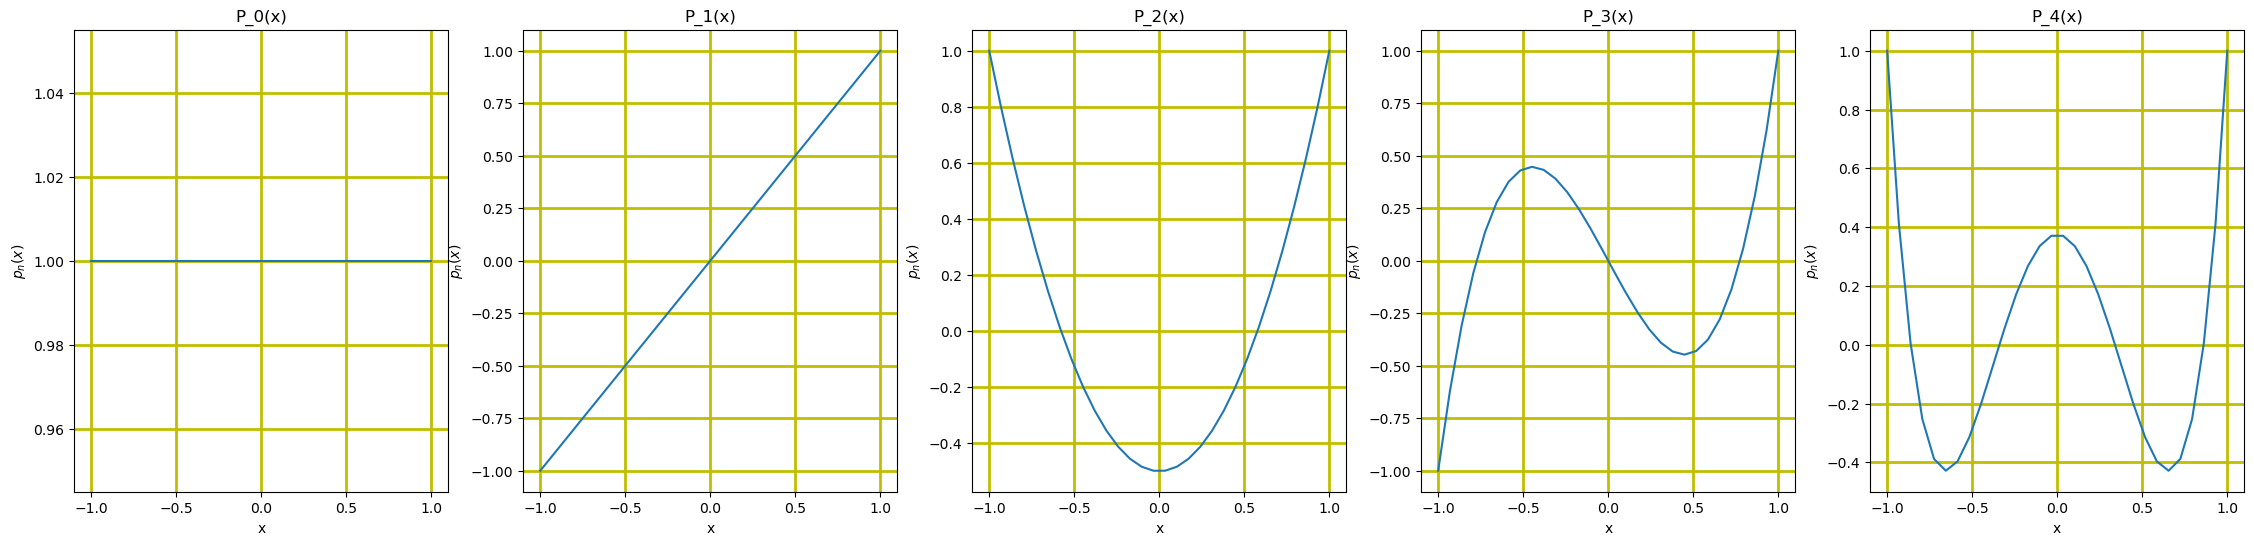

In [81]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as sc
import math 
def legendre(n, x):
    if n==0: 
        return np.ones(np.shape(x))
    elif n==1:
        return x
    else: 
        return ((2 * n-1) * x * legendre(n-1,x) - (n-1) * legendre(n-2, x))/n

x = np.linspace(-1, 1, 30)
fig, ax = plt.subplots(1, 5, figsize=(28,6))
for n in range(5):
    ax[n].plot(x, legendre(n, x))
    ax[n].set_xlabel('x')
    ax[n].set_ylabel('$P_n(x)$')
    ax[n].grid(color='y', linestyle='-', linewidth=2)
    ax[n].set_title('P_'+str(n)+'(x)')

 ## plot the first 5 eigen states

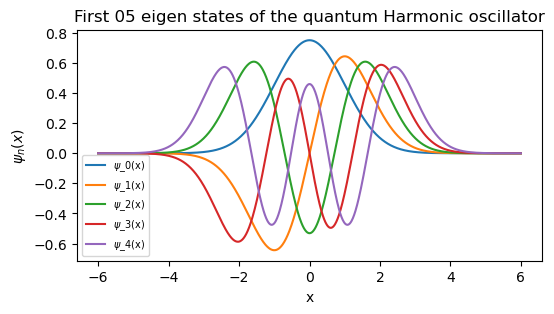

In [113]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy.special as sc
import math 

def sch(n, x):
    sc1 = sc.hermite(n, monic = False)
    return ((1/np.pi) ** (1/4) * np.exp(-x ** 2/2) * sc1(x))/(np.sqrt(2 ** n * math.factorial(n)))

x = np.linspace(-6, 6, 1000)
plt.figure(figsize = (6, 3))
for i in range(5):
    plt.plot(x, sch(i, x), label = "$\psi$_"+str(i)+"(x)")
    plt.xlabel('x')
    plt.ylabel('$\psi_n(x)$')
    plt.title("First 05 eigen states of the quantum Harmonic oscillator")
    plt.legend(loc = 3, fontsize = 7)